# Drill: Present the same data multiple ways

Unit 1: Lesson 3: Project 3

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.
Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.

**This is not going to be a neat notebook, more of a scratchpatch to play with graphs**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [7]:
baseball = pd.read_csv('baseball.csv')

In [8]:
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [9]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [10]:
baseball.Team.describe()

count     1232
unique      39
top        CHW
freq        47
Name: Team, dtype: object

# Plotting the same data 4 different ways

In [18]:
teams = baseball.Team.get_values()
print(teams[0:30])

['ARI' 'ATL' 'BAL' 'BOS' 'CHC' 'CHW' 'CIN' 'CLE' 'COL' 'DET' 'HOU' 'KCR'
 'LAA' 'LAD' 'MIA' 'MIL' 'MIN' 'NYM' 'NYY' 'OAK' 'PHI' 'PIT' 'SDP' 'SEA'
 'SFG' 'STL' 'TBR' 'TEX' 'TOR' 'WSN']


In [22]:
BlueJays = baseball.loc[baseball['Team']=='TOR']
BlueJays.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
28,TOR,AL,2012,716,784,73,0.309,0.407,0.245,0,NaN,NaN,162,0.335,0.438
58,TOR,AL,2011,743,761,81,0.317,0.413,0.249,0,NaN,NaN,162,0.328,0.419
88,TOR,AL,2010,755,728,85,0.312,0.454,0.248,0,NaN,NaN,162,0.326,0.405
118,TOR,AL,2009,798,771,75,0.333,0.440,0.266,0,NaN,NaN,162,0.339,0.434
148,TOR,AL,2008,714,610,86,0.331,0.399,0.264,0,NaN,NaN,162,0.309,0.380


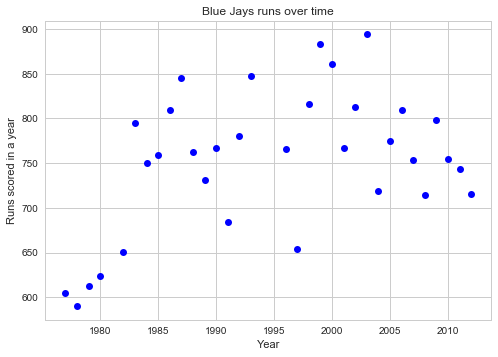

In [70]:
# A simple line graph
sns.set(style='whitegrid')
plt.plot(BlueJays['Year'], BlueJays['RS'], 'bo')
plt.ylabel('Runs scored in a year')
plt.xlabel('Year')
plt.title('Blue Jays runs over time')
plt.show()

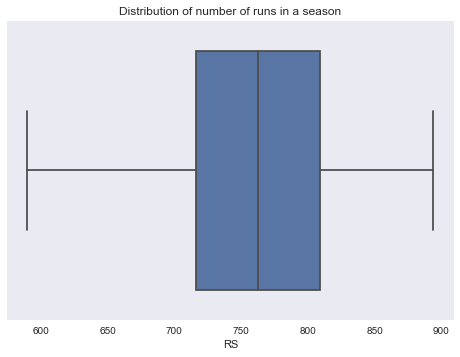

In [66]:
# And one more... might as well put in a box

sns.boxplot(BlueJays['RS'])
plt.title('Distribution of number of runs in a season')
plt.show()

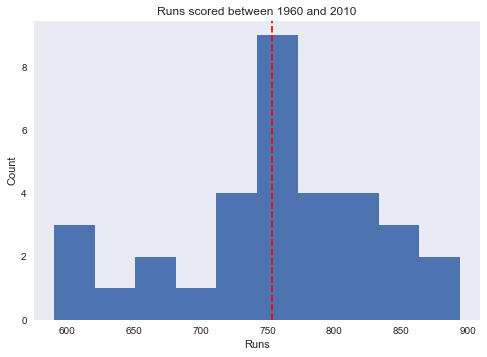

In [69]:
plt.hist(BlueJays['RS'])
plt.title('Runs scored between 1960 and 2010')
plt.ylabel("Count")
plt.xlabel("Runs")
plt.axvline(BlueJays['RS'].mean(), label = 'Average runs scored', color='r', linestyle = 'dashed')
plt.show()

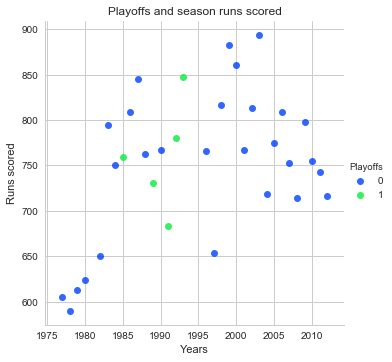

In [31]:
# Did they make it to the playoffs?
g= sns.lmplot(x='Year', y='RS', hue='Playoffs', palette='bright', data=BlueJays, fit_reg=False)
g.set_ylabels('Runs scored')
g.set_xlabels('Years')
plt.title('Playoffs and season runs scored')
plt.show()

# Continuous and categorical variable

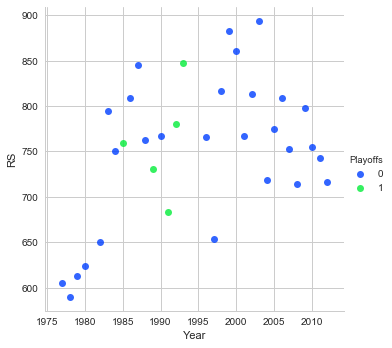

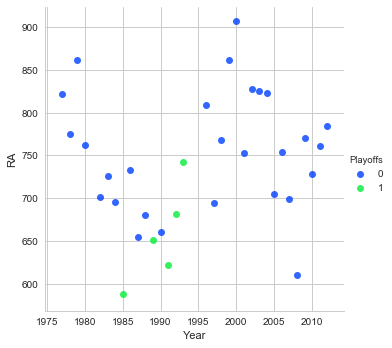

In [34]:
# Not much in this graph, runs scored isn't the only factor that matters, need to add in runs allowed
# Also, BlueJays not exactly setting the world alight in making playoffs...

sns.lmplot(x='Year', y='RS', hue='Playoffs', palette='bright', data=BlueJays, fit_reg=False)
sns.lmplot(x='Year', y='RA', hue='Playoffs', palette='bright', data=BlueJays, fit_reg=False)
plt.show()

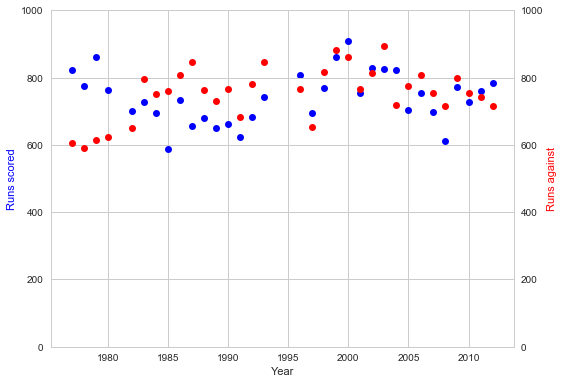

In [48]:
# Trying to plot two points per year in scatter, this is going to be messy
fig, ax = plt.subplots()
ax.plot(BlueJays['Year'], BlueJays['RA'],'bo')
ax.set_xlabel('Year')
plt.ylim([0, 1000])
ax.set_ylabel('Runs scored',color = 'b')

ax2 = ax.twinx() # Create another axes that shares
ax2.plot( BlueJays['Year'], BlueJays['RS'],'ro')
ax2.set_ylabel('Runs against',color = 'r')
plt.ylim([0, 1000])
fig.tight_layout()
plt.show()

In [59]:
BlueNY = baseball.loc[baseball['Team'].isin(['TOR','NYY'])]
BlueNY.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,1,3.0,3.0,162,0.311,0.419
28,TOR,AL,2012,716,784,73,0.309,0.407,0.245,0,NaN,NaN,162,0.335,0.438
48,NYY,AL,2011,867,657,97,0.343,0.444,0.263,1,2.0,4.0,162,0.322,0.399
58,TOR,AL,2011,743,761,81,0.317,0.413,0.249,0,NaN,NaN,162,0.328,0.419
78,NYY,AL,2010,859,693,95,0.350,0.436,0.267,1,3.0,3.0,162,0.322,0.399


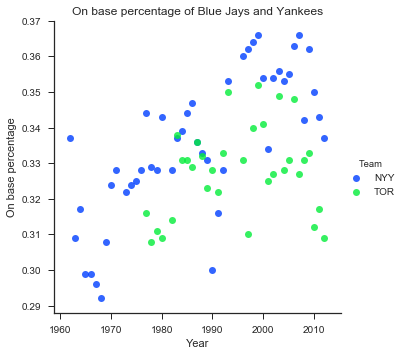

In [62]:
sns.set(style='ticks')
g = sns.lmplot(y='OBP', x='Year', data=BlueNY, hue='Team', palette='bright', fit_reg=False, ci=False)
g.set_ylabels('On base percentage')
g.set_xlabels('Year')
plt.title('On base percentage of Blue Jays and Yankees')
plt.show()

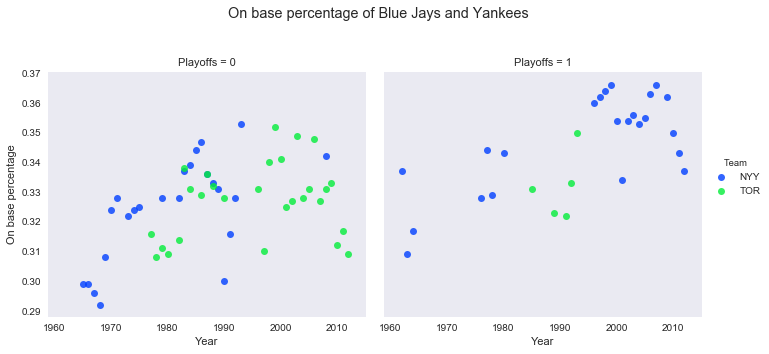

In [65]:
sns.set(style='dark')
g = sns.lmplot(y='OBP', x='Year', data=BlueNY, hue='Team', palette='bright', col='Playoffs', fit_reg=False, ci=False)
g.set_ylabels('On base percentage')
g.set_xlabels('Year')
plt.suptitle('On base percentage of Blue Jays and Yankees')
plt.subplots_adjust(top=0.8)
plt.show()

In [75]:
# And now for something completely different
crashes = sns.load_dataset('car_crashes')
type(crashes)

pandas.core.frame.DataFrame

In [76]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [77]:
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


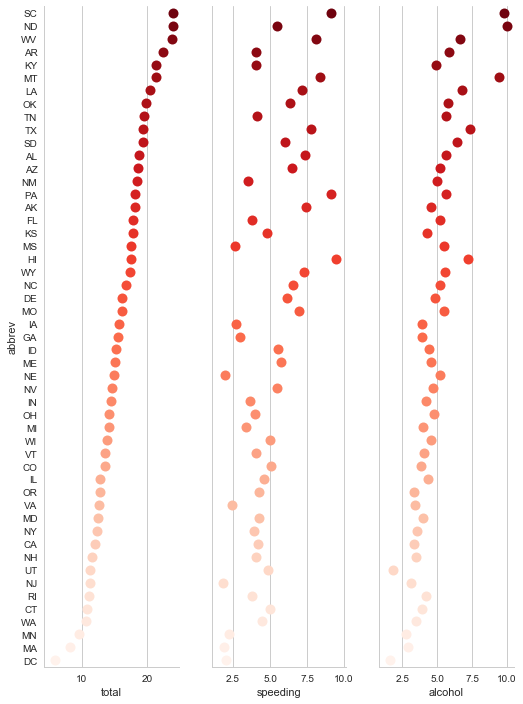

In [87]:
sns.set(style='whitegrid')
g = sns.PairGrid(crashes.sort_values('total', ascending=False),
                 x_vars=crashes.columns[3:6],
                 y_vars=['abbrev'], size=10,
                 aspect=0.25)
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")
# This bit isn't working because vertical lines persist
ax.set(title='Car crashes')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

In [104]:
# Back to baseball to try the same graph

# Change Teams into string
baseball['Team'] = baseball['Team'].astype('|S80')
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [106]:
# CHECK why this doesn't work...

g = sns.PairGrid(baseball.sort_values('RS', ascending=False),
                 x_vars=baseball.columns[0:3],
                 y_vars=['Team'], size=10,
                 aspect=0.25)
g.map(sns.stripplot, size=10, orient="h", palette="Reds_r", edgecolor="gray")


ValueError: could not convert string to float: b'CLE'

ValueError: could not convert string to float: b'CLE'

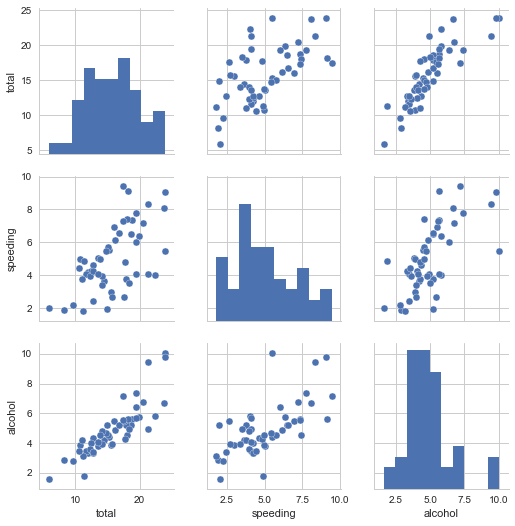

In [109]:
# Back to car crashes

g = sns.pairplot(crashes[["total", "speeding", "alcohol"]], diag_kind="hist")

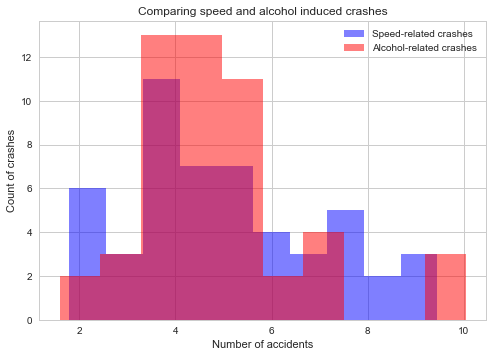

In [118]:
plt.hist(crashes['speeding'], alpha = 0.5, color='b', label = 'Speed-related crashes')
plt.hist(crashes['alcohol'], alpha = 0.5, color = 'r', label = 'Alcohol-related crashes')
plt.title('Comparing speed and alcohol induced crashes')
plt.ylabel('Count of crashes')
plt.xlabel('Number of accidents')
plt.legend()
plt.show()

# Challenge question

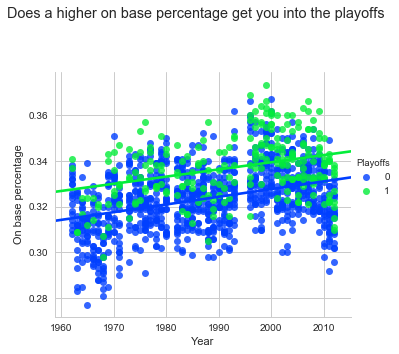

In [140]:
#How to increase fig size?!?


sns.set(style='whitegrid', )
g = sns.lmplot(y='OBP', x='Year', data=baseball, hue='Playoffs', palette='bright', fit_reg=True, ci=True)
g.set_ylabels('On base percentage')
g.set_xlabels('Year')
plt.suptitle('Does a higher on base percentage get you into the playoffs')
plt.subplots_adjust(top=0.8)
plt.show()

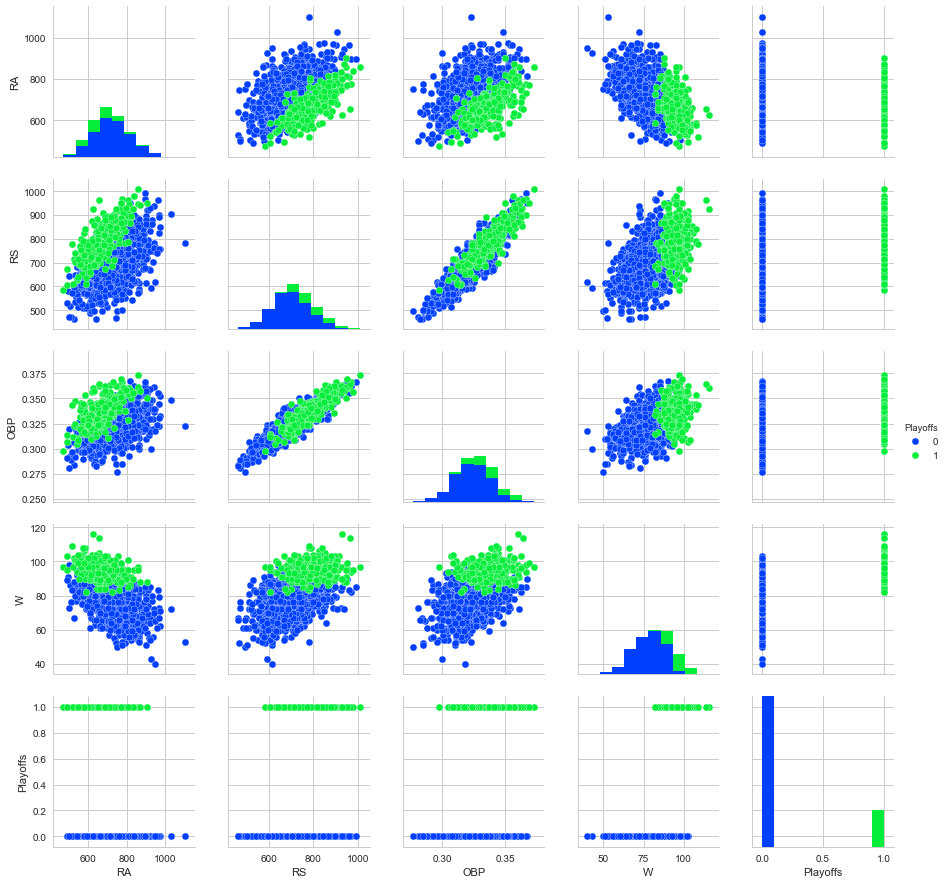

In [139]:
g = sns.pairplot(baseball[["RA", "RS", "OBP", "W", "Playoffs"]], palette='bright', hue='Playoffs', diag_kind="hist")